In [2]:
import pandas as pd

In [4]:
df = pd.read_excel('../data/raw/TEXTOS_Consultas_Psiquiatría.xlsx')
sum(df.ID=='#NULL!')

688

In [197]:
df.columns

Index(['Numero episodio', 'ID', 'Codigo consulta', 'MotivodeConsulta', 'Sexo',
       'Fecha de Nacimiento', 'Fecha consulta', 'Antecedentes psiquiátricos',
       'Antecedentes somáticos', 'Planificación suicida reciente',
       'EJEI Diagnóstico Codificado CIE10', 'EJEI Diagnóstico',
       'Grado de daño médico como resultado del intento actual',
       'Historia familiar de intentos de suicidio',
       'EJEII Transtorno Personalidad y Comportamiento L',
       'EJEII Transtorno Personalidad y Comportamiento',
       'Ideación suicida reciente', 'EJEIII Transtorno Somático Cod1',
       'EJEIII Transtorno Somático Txt',
       'Número de intentos de suicidio previos',
       'EJEIV Problemas Psicosociales y ambientales', 'TRATAMIENTO AL ALTA',
       'EXPLORACIÓN PSICOPATOLÓGICA'],
      dtype='object')

In [198]:
df.head()

,Numero episodio,ID,Codigo consulta,MotivodeConsulta,Sexo,Fecha de Nacimiento,Fecha consulta,Antecedentes psiquiátricos,Antecedentes somáticos,Planificación suicida reciente,...,Historia familiar de intentos de suicidio,EJEII Transtorno Personalidad y Comportamiento L,EJEII Transtorno Personalidad y Comportamiento,Ideación suicida reciente,EJEIII Transtorno Somático Cod1,EJEIII Transtorno Somático Txt,Número de intentos de suicidio previos,EJEIV Problemas Psicosociales y ambientales,TRATAMIENTO AL ALTA,EXPLORACIÓN PSICOPATOLÓGICA
0,2687,1110154,IDEACIÓN AUTOLÍTICA,NaN,M,01/80,2019-07-14 13:52:20,ANTECEDENTES SOMÁTICOS:\n- No RAMC\n- Obesidad...,ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,No,...,No,F60.3- Trastorno límite de personalidad,Transtorno de la personalidad sin especificar,Si,NaN,.\n .\n .,3,NaN,- Elontril 150 mg (1-0-0)\n- Pristiq 100 mg (1...,Consciente y orientada en las tres esferas. Ab...
1,2694,1110154,IDEACIÓN AUTOLÍTICA,Conflicto interpersonal,M,01/80,2019-07-17 20:48:42,ANTECEDENTES SOMÁTICOS:\n- No RAMC.\n- Patolog...,ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,No,...,No,F60.3- Trastorno límite de personalidad,Transtorno de la personalidad sin especificar,Si,NaN,.\n .\n .,3,NaN,- Elontril 150 mg (1-0-0)\n- Pristiq 100 mg (1...,Consciente y orientada en las tres esferas. Ab...
2,2729,20176590,ALTERACIONES DEL COMPORTAMIENTO / CONDUCTA,Conducta suicida,H,10/76,2019-07-17 10:23:48,"- Seguimiento en CAID Usera, en tratamiento co...",ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,No,...,No,NaN,NaN,Si,NaN,NaN,0,NaN,NaN,Consciente y orientado en las tres esferas. Ab...
3,2362,1203116,INTOXICACIÓN AGUDA (INCLUYENDO ETÍLICA Y/O POR...,Conducta suicida,H,08/34,2020-06-30 14:36:03,"ANTECEDENTES SOMÁTICOS: \n- No HTA, No DM, No ...",ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,Si,...,No,NaN,NaN,Si,NaN,NaN,0,NaN,NaN,Consciente y orientado en las 3 esferas. Recue...
4,7239,22182682,INTOXICACIÓN AGUDA (INCLUYENDO ETÍLICA Y/O POR...,Conducta suicida,M,12/71,2019-05-09 15:39:19,- Hipotiroidismo\n- Cancer de mamá\n\n- Intent...,ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,Si,...,No,NaN,NaN,Si,NaN,NaN,1,NaN,NaN,"Bajo nivel de conciencia. Bradipsíquica, bradi..."


In [199]:
len(df)

65535

In [200]:
for col in df.columns:
    print(col, end=': ')
    print(len(df[col].unique()))

Numero episodio: 65535
ID: 8777
Codigo consulta: 858
MotivodeConsulta: 40
Sexo: 3
Fecha de Nacimiento: 935
Fecha consulta: 65270
Antecedentes psiquiátricos: 12614
Antecedentes somáticos: 1925
Planificación suicida reciente: 3
EJEI Diagnóstico Codificado CIE10: 769
EJEI Diagnóstico: 6224
Grado de daño médico como resultado del intento actual: 129
Historia familiar de intentos de suicidio: 3
EJEII Transtorno Personalidad y Comportamiento L: 18
EJEII Transtorno Personalidad y Comportamiento: 162
Ideación suicida reciente: 3
EJEIII Transtorno Somático Cod1: 227
EJEIII Transtorno Somático Txt: 539
Número de intentos de suicidio previos: 83
EJEIV Problemas Psicosociales y ambientales: 37
TRATAMIENTO AL ALTA: 35750
EXPLORACIÓN PSICOPATOLÓGICA: 5555


In [201]:
df.Sexo.unique() # D es el cambio de sexo

array(['M', 'H', 'D'], dtype=object)

In [217]:
print(sum(df.Sexo=='D')) # los descartamos
df = df[~(df.Sexo=='D')]
df.loc[df.Sexo=='H', 'Sexo'] = 1
df.loc[df.Sexo=='M', 'Sexo'] = 0

0


In [203]:
df['Planificación suicida reciente'].unique() # Más grave. Ha pensado cómo hacerlo

array(['No', 'Si', nan], dtype=object)

In [204]:
df['Ideación suicida reciente'].unique() # Pensamientos solamente

array(['Si', 'No', nan], dtype=object)

In [205]:
df['Ideación suicida reciente'] == df['Planificación suicida reciente'] # No coinciden, lógicamente

0        False
1        False
2        False
3         True
4         True
         ...  
65530    False
65531    False
65532    False
65533    False
65534    False
Length: 65531, dtype: bool

In [206]:

df['Ideación suicida reciente'] = df['Ideación suicida reciente'].apply(lambda x: 1 if x=='Si' else 0 if x=='No' else None)
df['Planificación suicida reciente'] = df['Planificación suicida reciente'].apply(lambda x: 1 if x=='Si' else 0 if x=='No' else None)


In [207]:
df.loc[((df['Ideación suicida reciente']==0) | (df['Ideación suicida reciente']==None)) & (df['Planificación suicida reciente']==1), 'ID']

df

,Numero episodio,ID,Codigo consulta,MotivodeConsulta,Sexo,Fecha de Nacimiento,Fecha consulta,Antecedentes psiquiátricos,Antecedentes somáticos,Planificación suicida reciente,...,Historia familiar de intentos de suicidio,EJEII Transtorno Personalidad y Comportamiento L,EJEII Transtorno Personalidad y Comportamiento,Ideación suicida reciente,EJEIII Transtorno Somático Cod1,EJEIII Transtorno Somático Txt,Número de intentos de suicidio previos,EJEIV Problemas Psicosociales y ambientales,TRATAMIENTO AL ALTA,EXPLORACIÓN PSICOPATOLÓGICA
0,2687,1110154,IDEACIÓN AUTOLÍTICA,NaN,M,01/80,2019-07-14 13:52:20,ANTECEDENTES SOMÁTICOS:\n- No RAMC\n- Obesidad...,ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,0.0,...,No,F60.3- Trastorno límite de personalidad,Transtorno de la personalidad sin especificar,1.0,NaN,.\n .\n .,3,NaN,- Elontril 150 mg (1-0-0)\n- Pristiq 100 mg (1...,Consciente y orientada en las tres esferas. Ab...
1,2694,1110154,IDEACIÓN AUTOLÍTICA,Conflicto interpersonal,M,01/80,2019-07-17 20:48:42,ANTECEDENTES SOMÁTICOS:\n- No RAMC.\n- Patolog...,ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,0.0,...,No,F60.3- Trastorno límite de personalidad,Transtorno de la personalidad sin especificar,1.0,NaN,.\n .\n .,3,NaN,- Elontril 150 mg (1-0-0)\n- Pristiq 100 mg (1...,Consciente y orientada en las tres esferas. Ab...
2,2729,20176590,ALTERACIONES DEL COMPORTAMIENTO / CONDUCTA,Conducta suicida,H,10/76,2019-07-17 10:23:48,"- Seguimiento en CAID Usera, en tratamiento co...",ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,0.0,...,No,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,Consciente y orientado en las tres esferas. Ab...
3,2362,1203116,INTOXICACIÓN AGUDA (INCLUYENDO ETÍLICA Y/O POR...,Conducta suicida,H,08/34,2020-06-30 14:36:03,"ANTECEDENTES SOMÁTICOS: \n- No HTA, No DM, No ...",ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,1.0,...,No,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,Consciente y orientado en las 3 esferas. Recue...
4,7239,22182682,INTOXICACIÓN AGUDA (INCLUYENDO ETÍLICA Y/O POR...,Conducta suicida,M,12/71,2019-05-09 15:39:19,- Hipotiroidismo\n- Cancer de mamá\n\n- Intent...,ANTECEDENTES PERSONALES\nHABITOS TÓXICOS\nFuma...,1.0,...,No,NaN,NaN,1.0,NaN,NaN,1,NaN,NaN,"Bajo nivel de conciencia. Bradipsíquica, bradi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,254284,#NULL!,1ª CONSULTA PSIQUIATRIA - C,NaN,H,03/74,2018-06-28 09:04:06,"Ha recibido los diagnósticos de TLP, CI límite...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Añadir al tratamiento habitual: \n- Invega 3mg...,NaN
65531,254374,#NULL!,REVISION PSIQUIATRIA - C,Ansiedad,M,12/95,2018-06-28 12:13:08,Antecedentes psiquiátricos: \n- Primer contact...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"28/06/2018\nConcerta 18 mg 0.0.1 una semana, ...",NaN
65532,254522,#NULL!,REVISION PSIQUIATRIA - C,NaN,H,03/64,2018-06-29 09:45:41,En su historial constan las siguiente informac...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29/04/2016\nPristiq 100 mg 1.0.0\nPristiq 50 m...,NaN
65533,705884,#NULL!,VALORACION SIN PACIENTE PRESENCIAL,NaN,H,01/56,2021-01-20 09:39:49,Desde el servicio de psiquiatría de la FJD le ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
df['idea_planif_suicida_reciente'] = None

# Si lo ha planificado lo ha ideado también, pero el médico marcó solo la opción más grave.
df.loc[((df['Ideación suicida reciente']==0) |
        (df['Ideación suicida reciente']==None)) & 
        (df['Planificación suicida reciente']==1), 'Ideación suicida reciente'] = 1 

df.loc[(df['Ideación suicida reciente']==1) & (df['Planificación suicida reciente']==1), 'idea_planif_suicida_reciente'] = 2
df.loc[(df['Ideación suicida reciente']==1) & (df['Planificación suicida reciente']==0), 'idea_planif_suicida_reciente'] = 1
df.loc[(df['Ideación suicida reciente']==0) & (df['Planificación suicida reciente']==0), 'idea_planif_suicida_reciente'] = 0

df.drop(['Ideación suicida reciente', 'Planificación suicida reciente'], axis=1, inplace=True)

In [209]:
df['idea_planif_suicida_reciente'].unique()

array([1, 2, 0, None], dtype=object)

In [210]:
import datetime

import numpy as np

def fix_date(x):
    month, year = x.split('/')
    if year > '02':
        year = '19' + year
    else:
        year = '20' + year
    return int(year), int(month)

df.sort_values('Fecha consulta', inplace=True)
df['Fecha de Nacimiento'] = df['Fecha de Nacimiento'].apply(lambda x: datetime.date(*fix_date(x), 1) if x is not None else None)
# df['Fecha consulta'] = df['Fecha consulta'].apply(lambda x: pd.to_datetime(x))

In [211]:
df['Fecha consulta'].dtype

dtype('<M8[ns]')

In [212]:
len(df['Codigo consulta'].unique())

858

In [213]:
len(df.ID.unique())

8776

In [214]:
df.dtypes

Numero episodio                                                    int64
ID                                                                object
Codigo consulta                                                   object
MotivodeConsulta                                                  object
Sexo                                                              object
Fecha de Nacimiento                                               object
Fecha consulta                                            datetime64[ns]
Antecedentes psiquiátricos                                        object
Antecedentes somáticos                                            object
EJEI Diagnóstico Codificado CIE10                                 object
EJEI Diagnóstico                                                  object
Grado de daño médico como resultado del intento actual            object
Historia familiar de intentos de suicidio                         object
EJEII Transtorno Personalidad y Comportamiento L   

In [215]:
def int_or_none(x):
    try: return int(x)
    except: return None

df.ID = df.ID.apply(int_or_none)
# df.ID.astype(int)

In [219]:
df.head(5)

,Numero episodio,ID,Codigo consulta,MotivodeConsulta,Sexo,Fecha de Nacimiento,Fecha consulta,Antecedentes psiquiátricos,Antecedentes somáticos,EJEI Diagnóstico Codificado CIE10,...,Historia familiar de intentos de suicidio,EJEII Transtorno Personalidad y Comportamiento L,EJEII Transtorno Personalidad y Comportamiento,EJEIII Transtorno Somático Cod1,EJEIII Transtorno Somático Txt,Número de intentos de suicidio previos,EJEIV Problemas Psicosociales y ambientales,TRATAMIENTO AL ALTA,EXPLORACIÓN PSICOPATOLÓGICA,idea_planif_suicida_reciente
33302,29982,490103.0,IDEACIÓN AUTOLÍTICA,NaN,0,1932-08-01,2014-09-10 10:31:57,NaN,NaN,NaN,...,NaN,NaN,Transtorno histriónico de la personalidad,NaN,NaN,NaN,NaN,NaN,NaN,None
60971,29984,1463442.0,ALTERACIONES DEL COMPORTAMIENTO / CONDUCTA en ...,Transtornos de conducta,1,1970-03-01,2014-09-10 13:55:52,Refiere varios intentos autolíticos por sobrei...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Actitud parcialmente abordable y colaboradora....,None
59984,29988,1437543.0,Esquizofrenia paranoide,Ansiedad,1,1960-11-01,2014-09-10 22:01:50,AP psiquiátricos: el paciente refiere múltiple...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tomar un comprimido de quetiapina 25mg en mome...,Contacto defectual. Se presenta adecuadamente ...,None
65075,29989,20096758.0,IDEACIÓN AUTOLÍTICA,Pensamiento suicida,1,1979-04-01,2014-09-11 11:27:01,"No alergias medicamentosas conocidas.\nNo HTA,...",NaN,NaN,...,NaN,NaN,Otros Transtornos específicos de la personalidad,NaN,NaN,NaN,NaN,El previo.,Consciente y orientado. Parcialmente abordable...,None
62082,29993,1500586.0,ANSIEDAD. NERVIOSISMO,Ansiedad,1,1969-12-01,2014-09-11 20:25:34,Sin contacto previo con psiquiatría hasta juni...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Escitalopram 10 mg 1-0-0\n\nMelatonina: 1 cp 2...,Aspecto cuidado. Consciente y orientado en las...,None


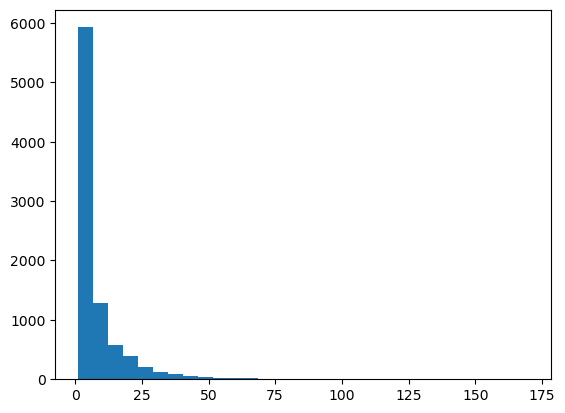

In [231]:
from matplotlib import pyplot as plt


plt.hist(df.groupby('ID')['ID'].count(), bins=30)
plt.show()

In [ ]:
# Si exploración psicopatológica está relleno, el paciente asistió por urgencias. Si no, con cita previa.
# remove useless columns
# EJES I y II los más importantes

# predict the time until the occurrence of the next episode of care **that is not a routine outpatient visit** use neural hawkes process
# we need features **about the patient** and 2 time series per patient indicating when the patient visited the hospital (scheduled appts and not scheduled)
